<a href="https://colab.research.google.com/github/s111100001/exercise/blob/master/Solutions_of_Equations_in_One_variable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **To find a solution to f(x)=0 given the continuous function f on the interval [a,b],where f(a) and f(b) have opposite signs**
在a,b區間內找出f(x)=0的解




### f(x) = -x^3-cosx , [a,b]=[-1,0]

In [0]:
import math
def f(x): ## 函數的方程式
  A = -x**3-math.cos(x)
  return A
def df(x): ## 函數的微分
  A = -3*x**2+math.sin(x)
  return A

## Bisection Method

若a,b區間有解，找出a,b兩點的中點代入函數，若與f(a)異號，設中點與a為新的區間，反之，設中點與b為新的區間，持續將範圍縮小直到找到代入函數為0或是小於誤差值


In [0]:
i=1;n=100; ## n為最多迭代次數
a=-1;b=0;tol=0.0001;## tol為誤差值
FA=f(a) 
while i<=n:
  p=a+(b-a)/2  ## 將區間剖半
  FP=f(p)
  if FP==0 or (b-a)/2<tol: ## 判斷是否繼續
    print('x= %13.10f'%(p)+' f(x)=0 迭代次數n= %d'%(i))
    break
  i=i+1
  if FA*FP > 0:  ## 判斷接下來要算哪個區間
    a=p;FA=FP;
  else:
    b=p
  if i==n:
    print('method failed') ## 若顯示method failed可能是迭代次數不夠多
  


x= -0.8654174805 f(x)=0 迭代次數n= 14


## Fixed-Point Iteration

找到輸入數值，讓輸出和輸入完全一樣。這樣的輸入稱作fixed point。持續代入前一次所算出來的數值，藉由找到f(x)與y=x這條線相連的點來找出我們要的答案，也就是得到fixed point，如果運氣不好或是函數不好可能會找不到

In [0]:
i=1;a=-1;n=10;tol=0.0001
while i<=n:
  p=f(a) ## 代入前一次的數值
  if abs(p-a)<tol:
    print('x= %13.10f'%(p)+' f(x)=0 迭代次數n= %d'%(i))
    break
  i=i+1
  a=p ## 代入前一次的數值
  if i==n:
    print('method failed')## 若顯示method failed可能是迭代次數不夠多 或是運氣不好

method failed


## Newton's Method

取函數線上的一個點a然後計算那個點a的斜率，找出與點a切線交於x軸的點的x座標，代入函數得到新點a，持續迭代縮小斜率範圍找出答案

In [0]:
i=1;a=-1;n=100;
while i<=n:
  p=a-f(a)/df(a) ## 計算切線點
  if abs(p-a)<0.0001:
    print('x= %13.10f'%(p)+' f(x)=0 迭代次數n= %d'%(i))
    break
  i=i+1
  a=p ## 代換兩個新點
  if i==n:
    print('method failed')## 若顯示method failed可能是迭代次數不夠多



x= -0.8654740331 f(x)=0 迭代次數n= 4


## Secant method

牛頓法用切線割線法用割線，取函數線上的兩個點a點b，找出通過點a與點b交於x軸的切線點的x座標，代入函數得到新點，原點b變作點a新點當作點b，持續迭代縮小範圍找出答案，計算次數與步驟較牛頓法多但不須微分，若取的點不夠靠近答案可能會做更久，割線呈水平狀時也可能會做不出來

In [0]:
i=2;a=-1;b=0;n=100;
q0=f(a);
q1=f(b);
while i<=n:
  p=b-q1*(b-a)/(q1-q0) ## 計算割線點
  if abs(p-b)<0.0001:
    print('x= %13.10f'%(p)+' f(x)=0 迭代次數n= %d'%(i))
    break
  i=i+1
  a=b;q0=q1;b=p;q1=f(p);
  if i==n:
    print('method failed')


x= -0.8654740144 f(x)=0 迭代次數n= 8


## Neville's Iterated Interpolation

多項式插值的算法，利用插值的方式來逼近答案，算出來的Q

In [0]:
x=[1,1.3,1.6,1.9,2.2]
y=[0.7651977,0.620086,0.4554022,0.2818186,0.1103623]
n=len(x);X=1.5;
import numpy as np
Q=np.zeros(shape=(n,n))
for i in range(1,n+1):
  Q[i-1][0] = y[i-1]

for i in range(1,n):
  for j in range(1,n):
    if i<j:
      Q[i][j] = 0
    else :
      Q[i][j]=((X-x[i-j])*Q[i][j-1]-(X-x[i])*Q[i-1][j-1])/(x[i]-x[i-j])
print(Q)


[[0.7651977  0.         0.         0.         0.        ]
 [0.620086   0.52334487 0.         0.         0.        ]
 [0.4554022  0.5102968  0.51247148 0.         0.        ]
 [0.2818186  0.5132634  0.51128567 0.51181269 0.        ]
 [0.1103623  0.510427   0.51373613 0.51183021 0.51181999]]


## Newton's Diveded Difference

均差（Divided differences）是遞歸除法過程。在數值分析中，可用於計算牛頓多項式形式的多項式插值的係數，這邊算出來的F就是多項式插值的係數

In [77]:
x=[1,1.3,1.6,1.9,2.2]
y=[0.7651977,0.6200860,0.4554022,0.2818186,0.1103623]
n=len(x);X=1.5;
import numpy as np
F=np.zeros(shape=(n,n))
for i in range(1,n+1):
  F[i-1][0] = y[i-1]
for i in range(1,n):
  for j in range(1,n):
    if i<j:
      F[i][j] = 0
    else :
      F[i][j] = (F[i][j-1]-F[i-1][j-1])/(x[i]-x[i-j])
print(F)


[[ 0.7651977   0.          0.          0.          0.        ]
 [ 0.620086   -0.48370567  0.          0.          0.        ]
 [ 0.4554022  -0.548946   -0.10873389  0.          0.        ]
 [ 0.2818186  -0.578612   -0.04944333  0.0658784   0.        ]
 [ 0.1103623  -0.571521    0.01181833  0.06806852  0.0018251 ]]


In [0]:
P=np.zeros(shape=(n,1))
pol=np.zeros(shape=(n,1))
P[0] = F[0][0]
pol[0] = 1
sum=P[0]
for i in range(1,n):
  P[i] = (F[i][i])
  pol[i]=pol[i-1]*(X-x[i-1]) ## 算(X-X_0)*...(X-X_k-1)
  sum = sum + P[i]*pol[i]
print(sum)



[0.51181999]


In [0]:
## Forward-Difference
P=np.zeros(shape=(n,1))
h=0.3;s=1/3; ## 逼近1.1 (1.0+0.3*1/3)
pol_f=np.zeros(shape=(n,1))
P[0] = F[0][0]
pol_f[0] = 1
sum=P[0]
for i in range(1,n):
  P[i] = (F[i][i]) ## 取第一排
  pol_f[i]= pol_f[i-1]*h*(s-i+1)
  sum = sum + P[i]*pol_f[i]
print(sum)


[0.71964599]


In [0]:
## Backward-Difference
P=np.zeros(shape=(n,1))
h=0.3;s=-2/3; ## 逼近2.0 (2.2-0.3*2/3)
pol_f=np.zeros(shape=(n,1))
P[0] = F[4][0]
pol_f[0] = 1
sum=P[0]
for i in range(1,n):
  P[i] = (F[4][i]) ## 取最後一排
  pol_f[i]= pol_f[i-1]*h*(s+i-1)
  sum = sum + P[i]*pol_f[i]
print(sum)


[0.22387536]


In [0]:
## Centered-difference 
P=np.zeros(shape=(n,1))
h=0.3;s=-1/3; ## 逼近1.5 (1.6+0.3*-1/3)
pol_f=np.zeros(shape=(n,1))
P[0] = F[2][0]
pol_f[0] = 1
sum=P[0]
for i in range(1,n):
  if len(x)%2 == 1: ## x若為奇數個
    if i%2 == 1: ## i是奇數會有偶數個非0數字
      div = int((len(x)-i)/2) ## 這列有幾個非0數字
      P[i] = (F[i-1+div][i])+(F[i+div][i]) ## 偶數個取兩個
      if i == 1:
        pol_f[i]= s*h/2
      else :
        pol_f[i] = pol_f[i-2]*((s**2)-(i//2)**2)*h**2
    else :  ## i是偶數會有奇數個非0數字
      div = (len(x)-i)//2  
      P[i] = F[i+div][i] ## 奇數個取最中間的
      if i == 2:
        pol_f[i]= (s**2)*(h**2)
      else :
        pol_f[i] = pol_f[i-2]*((s**2)-((i/2)-1)**2)*h**2

  else: ## x若為偶數個
    if i%2 == 1: ## i是奇數會有奇數個非0數字
      div = (len(x)-i)//2 ## 這列有幾個非0數字
      P[i] = F[i+div][i] ## 奇數個取最中間的
    else :  ## i是偶數會有偶數個非0數字
      div = int((len(x)-i)/2) ## 這列有幾個非0數字
      P[i] = (F[i-1+div][i])+(F[i+div][i]) ## 偶數個取兩個

  
  sum = sum + P[i]*pol_f[i]
print(sum)

[0.51181999]


### Cubic spline

In [0]:
import math

def F(x): ## function f
  A = 1/(1+25*(x**2))
  return A


In [0]:
n=4
x = [-1,-0.5,0,0.5,1]
a = []
for i in range(n+1): ## a為f(x)
  a.append(F(x[i]))
FPO = 0.33
FPN = -1.5

In [91]:
a

[0.038461538461538464,
 0.13793103448275862,
 1.0,
 0.13793103448275862,
 0.038461538461538464]

In [92]:
h=[]
for i in range(n):
  h.append(x[i+1]-x[i])
h

[0.5, 0.5, 0.5, 0.5]

In [93]:
alpha=[]
for i in range(1,n):
  alpha.append((3*(a[i+1]-a[i])/h[i])-(3*(a[i]-a[i-1])/h[i-1]))
alpha

[4.575596816976128, -10.344827586206897, 4.575596816976128]

In [0]:
l=[]
u=[]
z=[]
for i in range(n+1):
  if i==0:
    l.append(1)
    u.append(0)
    z.append(0)
  elif i==n:
    l.append(1)
    z.append(0)    
  else:
    l.append(2*(x[i+1]-x[i-1])-h[i-1]*u[i-1])
    u.append(h[i]/l[i])
    z.append((alpha[i-1]-h[i-1]*z[i-1])/l[i])


In [0]:
import numpy as np
c = np.zeros(shape=(n+1,1))
b = np.zeros(shape=(n+1,1))
d = np.zeros(shape=(n+1,1))
for j in range(n,-1,-1):
  if j==n:
    c[j]=0
  else:
    c[j] = z[j]-u[j]*c[j+1]
    b[j] = ((a[j+1]-a[j])/h[j])-h[j]*(c[j+1]+2*c[j])/3
    d[j] = (c[j+1]-c[j])/(3*h[j])

In [101]:
print(a)
print(b)
print(c)
print(d)

[0.038461538461538464, 0.13793103448275862, 1.0, 0.13793103448275862, 0.038461538461538464]
[[-4.83137552e-01]
 [ 1.56309208e+00]
 [ 2.22044605e-16]
 [-1.56309208e+00]
 [ 0.00000000e+00]]
[[ 0.        ]
 [ 4.09245926]
 [-7.21864343]
 [ 4.09245926]
 [ 0.        ]]
[[ 2.72830618]
 [-7.54073513]
 [ 7.54073513]
 [-2.72830618]
 [ 0.        ]]


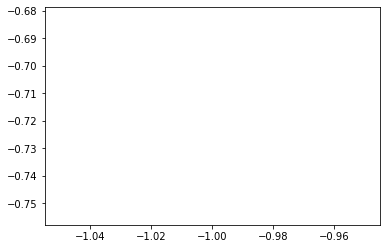

In [2]:
import matplotlib.pyplot as plt
import numpy as np
x = np.arange(-1,-0.5)
s1 = 1+1.466*x+0.25228*x**3
plt.plot(x,s1)
plt.show()

## Clamped Cubic Spline

In [0]:
## Input
n=3
x = [27.7,28,29,30]
a = [4.1,4.3,4.1,3]
FPO = 0.33
FPN = -1.5

In [8]:
a

[4.1, 4.3, 4.1, 3]

In [9]:
h=[]
for i in range(n):
  h.append(x[i+1]-x[i])
h

[0.3000000000000007, 1, 1]

In [12]:
alpha=[]
for i in range(n+1):
  if i==0:
    alpha.append((3*(a[1]-a[0])/h[0])-3*FPO)
  elif i==n:
    alpha.append(3*FPN-3*(a[n]-a[n-1])/h[n-1])
  else:
    alpha.append((3*(a[i+1]-a[i])/h[i])-(3*(a[i]-a[i-1])/h[i-1]))
  
alpha

[1.0099999999999971,
 -2.599999999999998,
 -2.6999999999999984,
 -1.200000000000001]

In [0]:
l=[]
u=[]
z=[]
for i in range(n+1):
  if i==0:
    l.append(2*h[0])
    u.append(0.5)
    z.append(alpha[0]/l[0])
  elif i==n:
    l.append(h[n-1]*(2-u[n-1]))
    z.append((alpha[n]-h[i-1]*z[n-1])/l[n])    
  else:
    l.append(2*(x[i+1]-x[i-1])-h[i-1]*u[i-1])
    u.append(h[i]/l[i])
    z.append((alpha[i-1]-h[i-1]*z[i-1])/l[i])

In [0]:
import numpy as np
c = np.zeros(shape=(n+1,1))
b = np.zeros(shape=(n+1,1))
d = np.zeros(shape=(n+1,1))
for j in range(n,-1,-1):
  if j==n:
    c[j]=z[n]
  else:
    c[j] = z[j]-u[j]*c[j+1]
    b[j] = ((a[j+1]-a[j])/h[j])-h[j]*(c[j+1]+2*c[j])/3
    d[j] = (c[j+1]-c[j])/(3*h[j])

In [15]:
print(a)
print(b)
print(c)
print(d)

[4.1, 4.3, 4.1, 3]
[[ 0.33      ]
 [-0.29372937]
 [-0.54323432]
 [ 0.        ]]
[[ 1.43465347]
 [ 0.49735974]
 [-0.71353135]
 [-0.24323432]]
[[-1.04143748]
 [-0.40363036]
 [ 0.15676568]
 [ 0.        ]]
